In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [48]:
ruta_csv = 'Estadisticas_2024/stats_Hard.csv'

# Leer el CSV
df = pd.read_csv(ruta_csv)

# Mostrar las columnas disponibles 1 debajo de otra
print("Variables disponibles en el dataset:")
for col in df.columns:
    print(col)

Variables disponibles en el dataset:
Rk
Player
M
M W-L
M W%
SPW
SPW-InP
Aces
Ace%
DFs
DF%
DF/2s
1stIn
1st%
2nd%
2%-InP
Hld%
Pts/SG
PtsL/SG
Player_dup
M_dup
RPW
RPW-InP
vAce%
vDF%
v1st%
v2nd%
Brk%
Pts/RG
PtsW/RG
MdOppRk
MnOppRk
Player_dup.1
M_dup.1
BPConv%
BPConv
BPChnc
BP/G
BP/S
BP/M
Bks/S
Bks/M
BPSvd%
BPSaved
BPvs
BPvs/G
BPvs/S
BPvs/M
Bkn/S
Bkn/M
Player_dup.2
M_dup.2
DR
Points
TPW%
TBs
TB W-L
TB W%
TB/S
Sets
Set W-L
S W%
Gms
Game W-L
G W%
Time/Mt
Min/Set
Sec/Pt


In [50]:

# Ruta de entrada y salida
carpeta_entrada = 'Estadisticas_2024'
carpeta_salida = 'Estadisticas_2024_limpio_3'

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Lista de columnas que deseas eliminar (puedes modificarla)
columnas_a_eliminar = ['Player_dup', 'M_dup', 'M W-L', 'Aces', 'DFs', 'BPConv', 'BPSaved', 'BPvs', 'DR', 'TB W-L', 'Set W-L', 'Game W-L', 'Time/Mt','Min/Set', 'Sec/Pt'  ]
# 68-34= 34 columnas
# Procesar cada archivo CSV
# Procesar cada archivo CSV
for archivo in os.listdir(carpeta_entrada):
    if archivo.endswith('.csv'):
        ruta_entrada = os.path.join(carpeta_entrada, archivo)
        ruta_salida = os.path.join(carpeta_salida, archivo)

        # Leer CSV
        df = pd.read_csv(ruta_entrada)

        # Eliminar columnas duplicadas por nombre (quedarse con la primera)
        df = df.loc[:, ~df.columns.duplicated()]

        # Eliminar columnas con sufijos .1, .2, etc. (que vienen de duplicados)
        df = df.loc[:, ~df.columns.str.contains(r'\.\d+$')]

        # Limpieza de columnas y espacios
        df.columns = df.columns.str.strip()
        df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

        # Reemplazar símbolos
        df = df.replace({'%': '', ',': '.'}, regex=True)

        # Convertir columnas a numérico donde sea posible
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col])
            except Exception:
                pass  # No se puede convertir, se deja como está
        

        # Eliminar columnas no deseadas si existen
        df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

        # Limpiar la columna 'Player' quitando la nacionalidad entre corchetes
        if 'Player' in df.columns:
            df['Player'] = df['Player'].str.replace(r'\s*\[.*?\]', '', regex=True).str.strip()


        # Guardar el CSV limpio
        # df.to_csv(ruta_salida, index=False)
        # print(f'Archivo limpio guardado: {ruta_salida}')


In [51]:
print("Variables disponibles en el dataset:")
for col in df.columns:
    print(col)

Variables disponibles en el dataset:
Rk
Player
M
M W%
SPW
SPW-InP
Ace%
DF%
DF/2s
1stIn
1st%
2nd%
2%-InP
Hld%
Pts/SG
PtsL/SG
RPW
RPW-InP
vAce%
vDF%
v1st%
v2nd%
Brk%
Pts/RG
PtsW/RG
MdOppRk
MnOppRk
BPConv%
BPChnc
BP/G
BP/S
BP/M
Bks/S
Bks/M
BPSvd%
BPvs/G
BPvs/S
BPvs/M
Bkn/S
Bkn/M
Points
TPW%
TBs
TB W%
TB/S
Sets
S W%
Gms
G W%


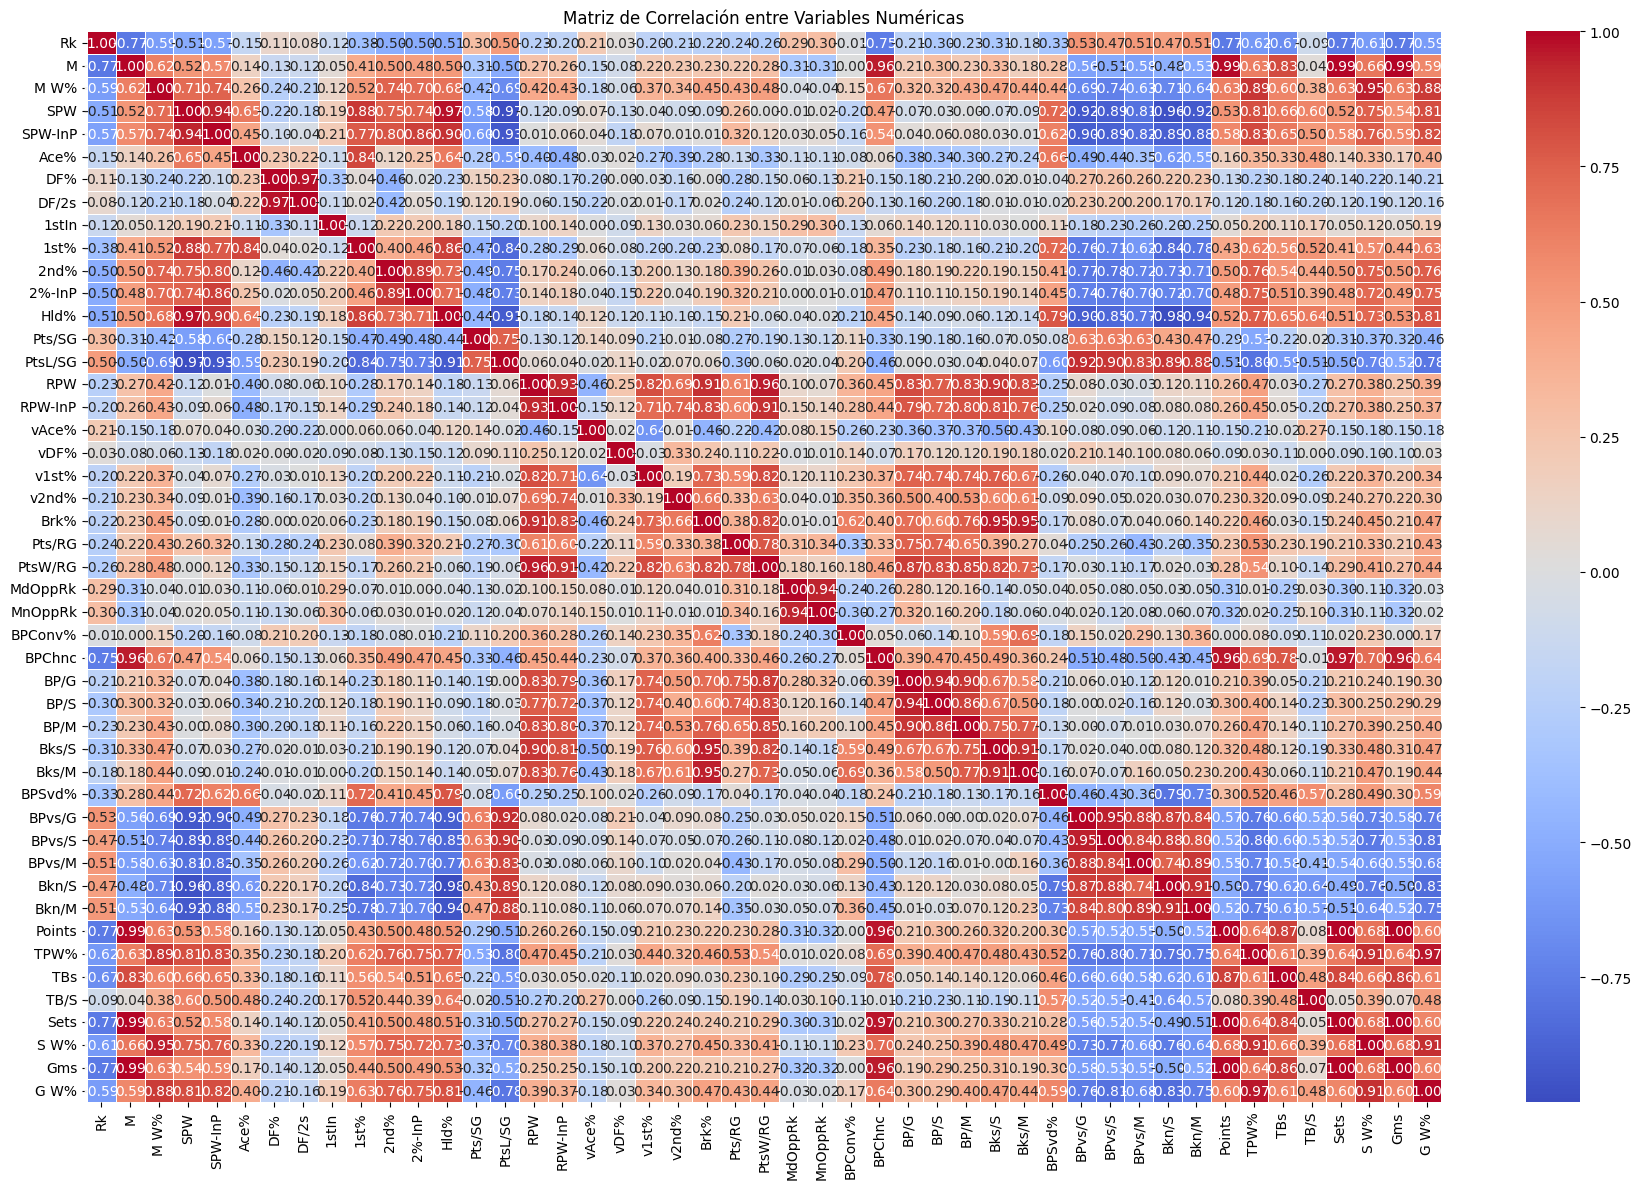

In [52]:
# Cargar el archivo
# df = pd.read_csv("Estadisticas_2024_limpio_2/estadisticas_generales_2024.csv")

# Eliminar columnas no numéricas o que contienen valores no convertibles directamente
df_clean = df.copy()

# # Quitar el símbolo '%' y convertir a float donde sea necesario
# df_clean = df_clean.replace('%', '', regex=True)

# # Convertir columnas relevantes a numéricas si es posible
# for col in df_clean.columns:
#     try:
#         df_clean[col] = pd.to_numeric(df_clean[col])
#     except:
#         pass  # Mantener columnas que no pueden convertirse (como nombres de jugadores)

# Seleccionar solo columnas numéricas
df_numeric = df_clean.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Dibujar el mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()